Модель Хольта_Винтерса

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from statsmodels.regression.linear_model import OLS
#from statsmodels.tools import add_constant
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#read data from file
data = pd.read_csv("ittensive.time.series.01.csv", decimal=',')
#change index
data = data[::-1].reset_index()
data.head()

,index,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,150,Нояб. '09,108.25,104.75,114.13,104.10,-,"3,34%"
1,149,Дек. '09,108.40,108.25,110.25,105.75,-,"0,14%"
2,148,Янв. '10,96.78,108.40,111.53,96.10,-,"-10,72%"
3,147,Февр. '10,97.13,97.03,101.13,91.43,-,"0,36%"
4,146,Март '10,98.88,97.13,100.38,91.78,-,"1,80%"


In [5]:
#Рассчитаем модель  Хольта-Винтерса
data["HW"] = ExponentialSmoothing(data["Цена"],
                                  seasonal_periods = 12).fit(smoothing_level=1,
                                                               smoothing_trend=0,
                                                               smoothing_seasonal=0).fittedfcast[:-1]

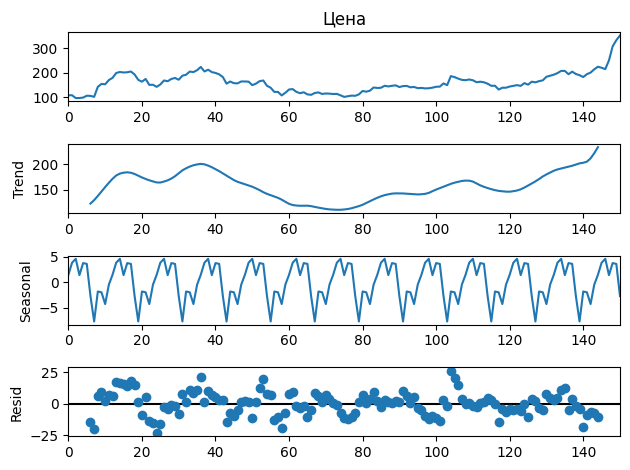

In [7]:
decompose_result = seasonal_decompose(data["Цена"], period=12)
decompose_result.plot();

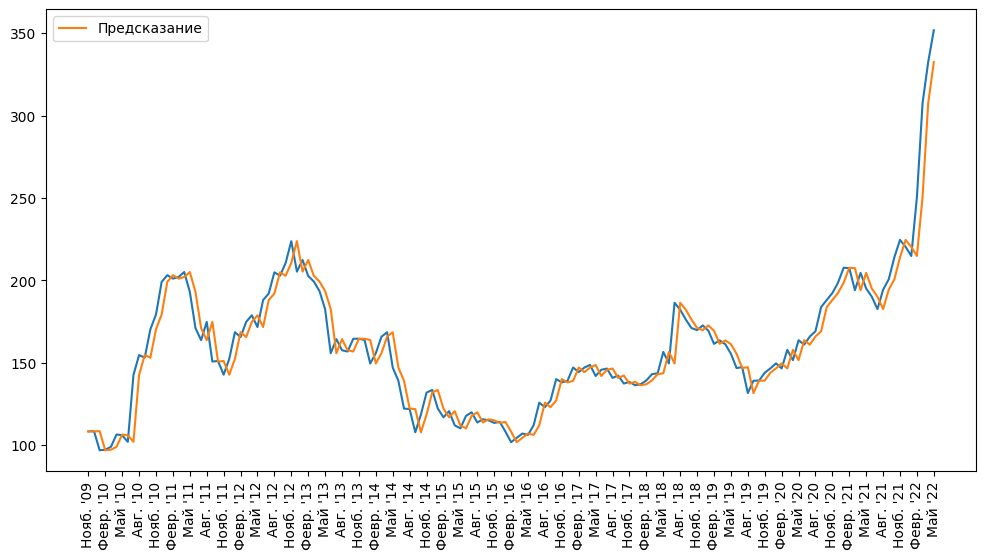

In [8]:
#draw curve
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values, data["Цена"].values)
plt.plot(data["HW"], label="Предсказание")
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.legend()
plt.show()

In [10]:
#Вычислим среднеквадратчную ошибку
print("MSE", round((data[12:].apply(lambda row: (row['Цена'] - row['HW'])**2, axis=1).sum()/len(data)-12)**(0.5),2))

MSE 10.0
